### Cell 1: Importing libraries

In [40]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn import preprocessing, decomposition  # For data preprocessing and PCA
import seaborn as sns  # For advanced visualization



### Cell 2: Loading Data


In [62]:
# Load the dataset from a .npy file using relative path
data = np.load('./MLProject2024/fashion_train.npy')

# Print the shape of the loaded data
print("Shape of the data:", data.shape)

Shape of the data: (10000, 785)




### Cell 3: Separating Features and Labels


In [42]:
# Separate the features (images) and labels from the dataset
images = data[:, :-1]  # All columns except the last one are features
labels = data[:, -1]  # The last column is the label

# Print the shape of the images array
print("Shape of images:", images.shape)

# Display the first 10 rows of the dataset for inspection
data[:10]

Shape of images: (10000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)



### Cell 4: PCA and Visualization


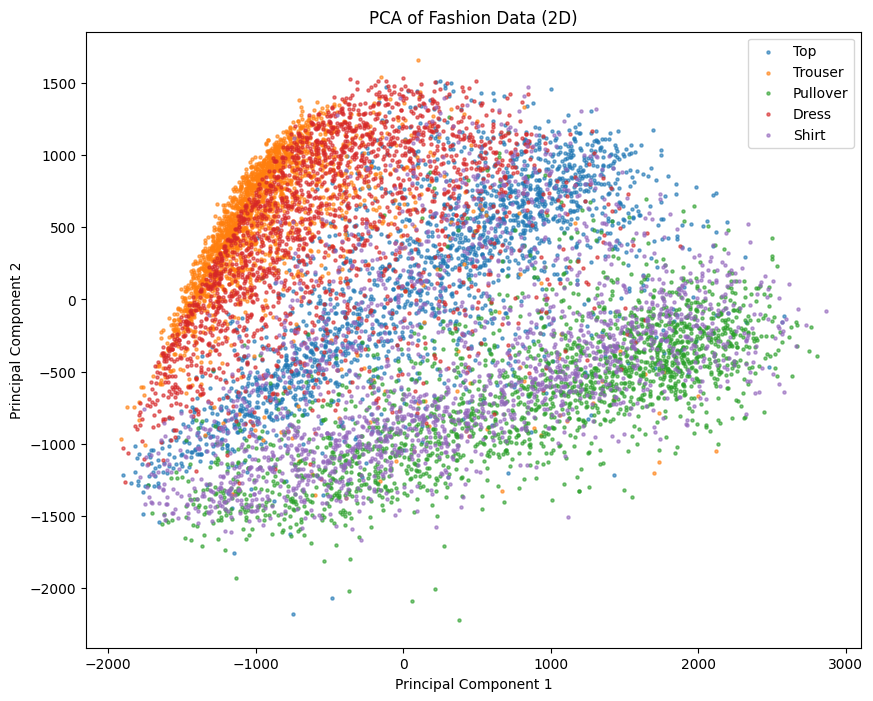

In [45]:
# Initialize PCA object
pca = decomposition.PCA()

# Fit PCA on the images and transform the data
pca_train = pca.fit_transform(images)

# Create a figure for the plot with specified size
plt.figure(figsize=(10, 8))

# Loop through each unique label to plot the data points
for label in np.unique(labels):
    # Scatter plot for each class
    plt.scatter(pca_train[labels == label, 0], pca_train[labels == label, 1], 
                label=class_mapping[label], alpha=0.6, s=5)
    

# Set the title and labels for the plot
plt.title('PCA of Fashion Data (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()



### Cell 5: Plotting Sample Images


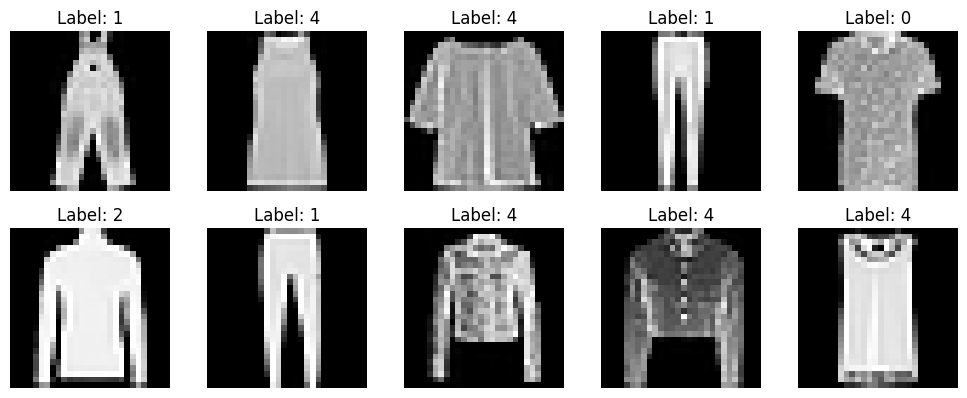

In [50]:
def plot_sample_images(images, labels, num_samples=10):
    # Select random indices from the images array without replacement
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False) 

    # Create a new figure with a specified size
    plt.figure(figsize=(10, 10))
    
    # Loop through the number of samples to plot each image
    for i in range(num_samples):
        # Create a subplot in a 5x5 grid
        plt.subplot(5, 5, i + 1)  
        
        # Display the image at the selected random index, reshaped to 28x28 pixels
        plt.imshow(images[random_indices[i]].reshape(28, 28), cmap='gray')  
        
        # Set the title of the subplot to the corresponding label
        plt.title(f'Label: {labels[random_indices[i]]}') 
        
        # Turn off the axis for a cleaner look
        plt.axis('off')
    
    # Adjust subplots to fit into the figure area
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Call the function to plot sample images with their labels
plot_sample_images(images, labels)

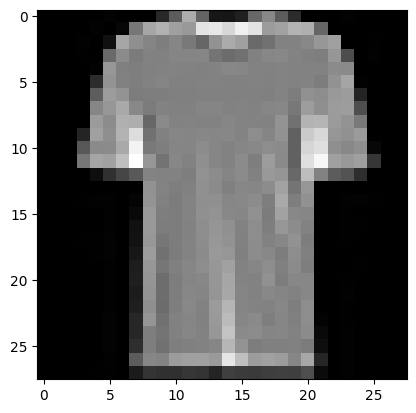

In [51]:
curr_img = np.reshape(data[0][:-1], (28,28))
plt.imshow(curr_img, cmap=plt.cm.gray);

In [52]:
train_df = pd.DataFrame(data)
class_mapping = {0:'Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Shirt'}
train_df.iloc[:,-1].replace(class_mapping, inplace=True)

C:\Users\Mykyta\AppData\Local\Temp\ipykernel_57612\1167889196.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.iloc[:,-1].replace(class_mapping, inplace=True)


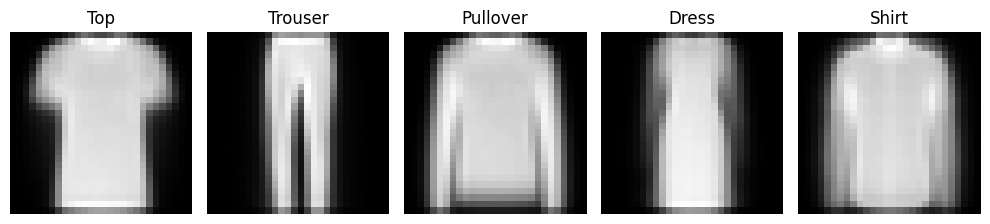

In [53]:
mean_images = []
for label in range(5):
    mean_image = np.mean(images[labels == label], axis=0).reshape(28, 28)
    mean_images.append(mean_image)

plt.figure(figsize=(10, 8))
for i, mean_image in enumerate(mean_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_mapping[i])
    plt.axis('off') 
plt.tight_layout()
plt.show()

In [54]:
mean = np.mean(data)
median = np.median(data)
minn = np.min(data)
maxx = np.max(data)
std = np.std(data)
print(f"{mean}, {median}, {minn}, {maxx}, {std}")

76.93116420382165, 14.0, 0, 255, 89.97942562765583


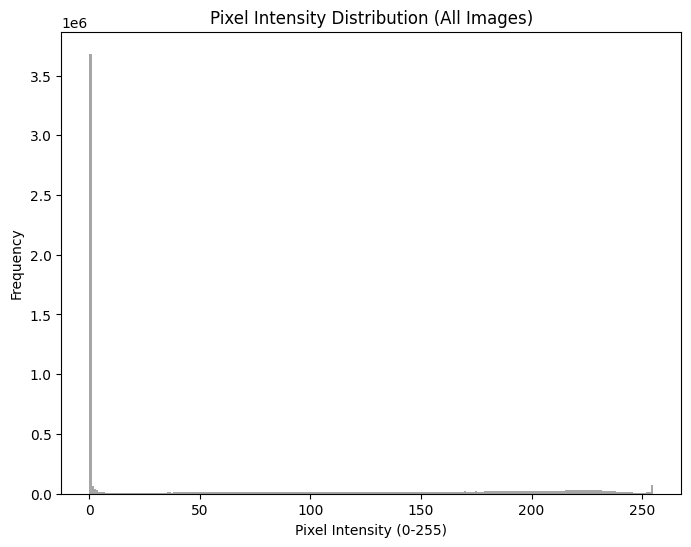

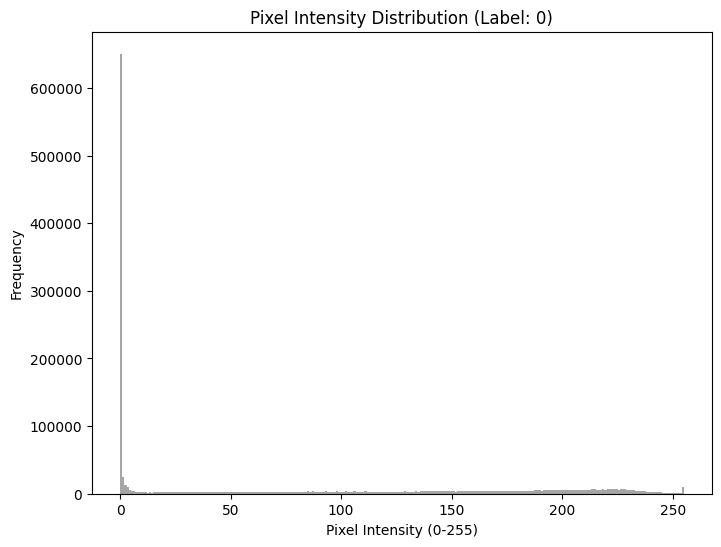

In [55]:
def plot_intensity_histogram(images, labels=None, label=None, bins=256):
    if label is not None:
        images = images[labels == label]
    
    all_pixels = images.flatten()

    plt.figure(figsize=(8, 6))
    plt.hist(all_pixels, bins=bins, color='gray', alpha=0.7)
    plt.title(f'Pixel Intensity Distribution (Label: {label})' if label is not None else 'Pixel Intensity Distribution (All Images)')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.show()

plot_intensity_histogram(images)

plot_intensity_histogram(images, labels=labels, label=0)

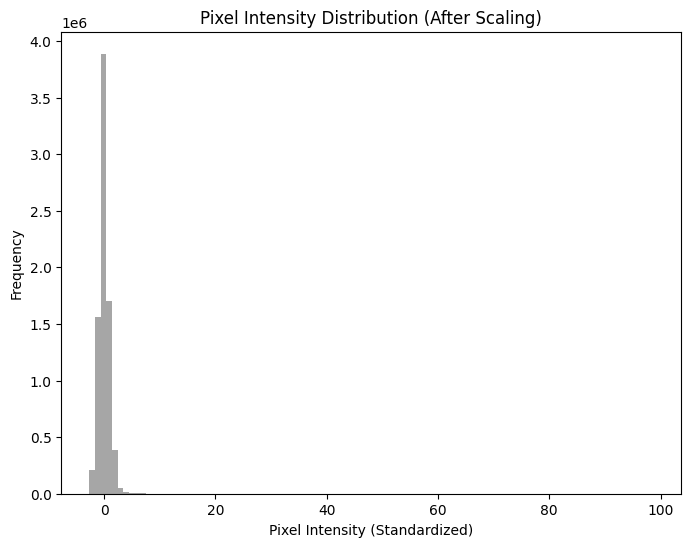

In [56]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

flattened_scaled_pixels = x.flatten()

plt.figure(figsize=(8, 6))
plt.hist(flattened_scaled_pixels, bins=100, color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution (After Scaling)')
plt.xlabel('Pixel Intensity (Standardized)')
plt.ylabel('Frequency')
plt.show()

In [58]:
print(pca.components_[:10])

[[ 5.82637305e-04  2.30631247e-03  2.34926124e-03 ...  1.33195002e-02
   5.81313508e-03  1.05615622e-03]
 [-9.84719199e-05 -2.29457213e-03 -5.69148192e-03 ... -2.04898046e-02
  -1.15426244e-02 -5.48839695e-03]
 [ 2.67124552e-03  1.05684466e-02  2.12765921e-02 ...  1.50343917e-03
   8.26990505e-03  6.90042583e-03]
 ...
 [-1.16550288e-02 -1.50928886e-02 -7.27539697e-02 ... -4.06647203e-02
  -4.09376326e-02 -3.89489033e-02]
 [ 9.23812166e-03  1.55193410e-03  3.31504832e-02 ...  7.72038486e-03
  -1.42891657e-02 -6.12657394e-03]
 [ 3.23172510e-02  2.92877030e-02  8.44633990e-02 ... -2.67592412e-02
  -1.26700156e-03  3.89846291e-02]]


In [59]:
print(sum(pca.explained_variance_ratio_[:10]))
print(pca.explained_variance_ratio_[:10])

0.6070046677611969
[0.22645698 0.13673557 0.06381166 0.05046707 0.03064291 0.02924805
 0.02197067 0.01880203 0.0147053  0.01416444]


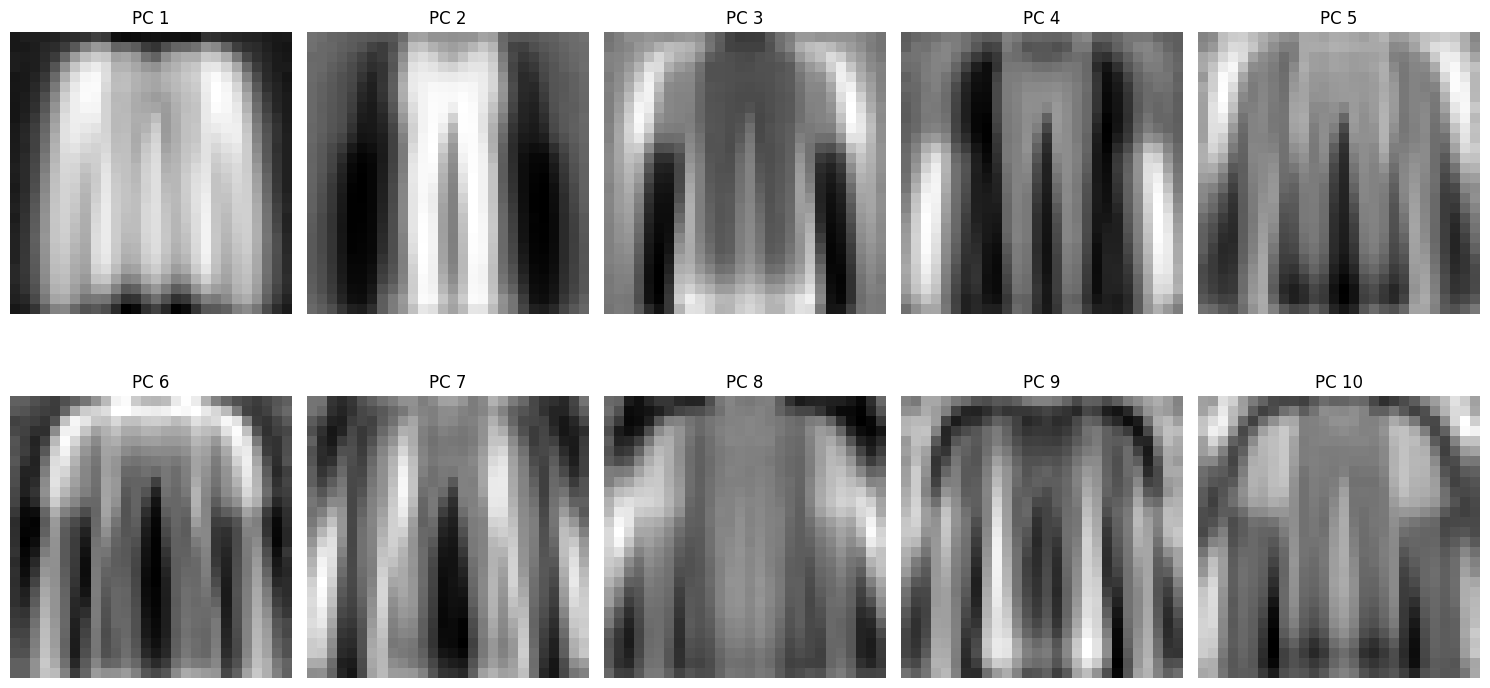

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


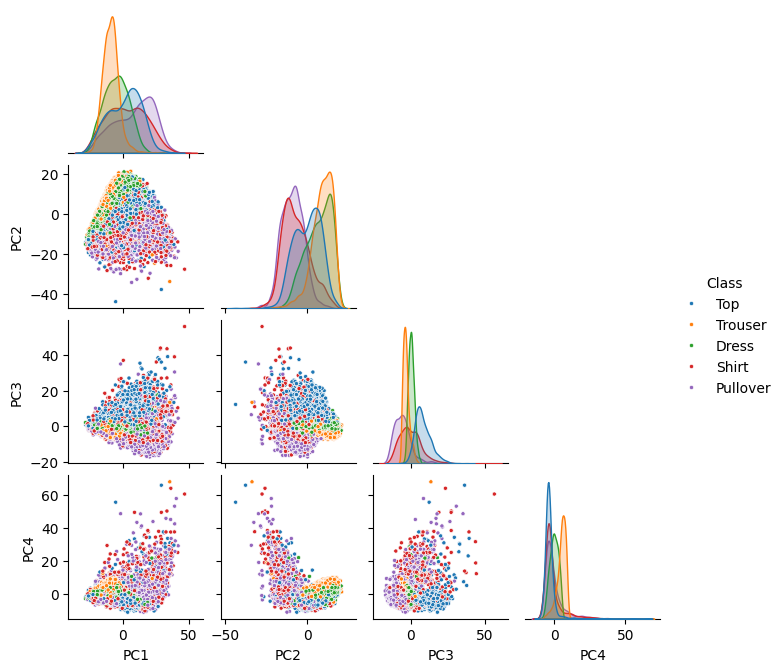

In [61]:
pc_labels = ['PC' + str(a) for a in range(1, len(pca_train[0])+1)]
pca_df = pd.DataFrame(pca_train, columns = pc_labels)

y = train_df.iloc[:,-1]

pca_4 = pca_df.copy()
pca_4 = pca_4[['PC1','PC2','PC3','PC4']]
pca_4['Class'] = y.reset_index(drop=True) 

sns.pairplot(data=pca_4,hue='Class',corner=True, markers = '.',height=1.7)
plt.show()